# Creating galleries from Linestring

In [2]:
import numpy as np
import pyvista as pv
import geopandas as gpd
from geometron.geom_to_vtk import gdf_to_ug

Importation of Geopackage

In [3]:
gdg = gpd.read_file('../../../../data/Galeries .gpkg')
gdg.head()

,Type,Profondeur,geometry
0,Bouveau,742.0,"LINESTRING Z (155464.833 123113.940 -614.100, ..."
1,Bouveau,893.0,"LINESTRING Z (154508.911 123546.899 -729.200, ..."
2,Bouveau,860.0,"LINESTRING Z (154580.524 123524.574 -726.400, ..."
3,Bouveau,860.0,"LINESTRING Z (154487.406 123649.737 -732.000, ..."
4,Lien bouveau,860.0,"LINESTRING Z (154574.791 123702.097 -762.000, ..."


Definition of the radius of the tubes of the galleries

In [4]:
gdg['radius']=2.5

For each line of the geodataframe, a loop returns the coordinates of the gallery points. 
A spline is created for each group of points. 
This spline is then transformed into a tube.

/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


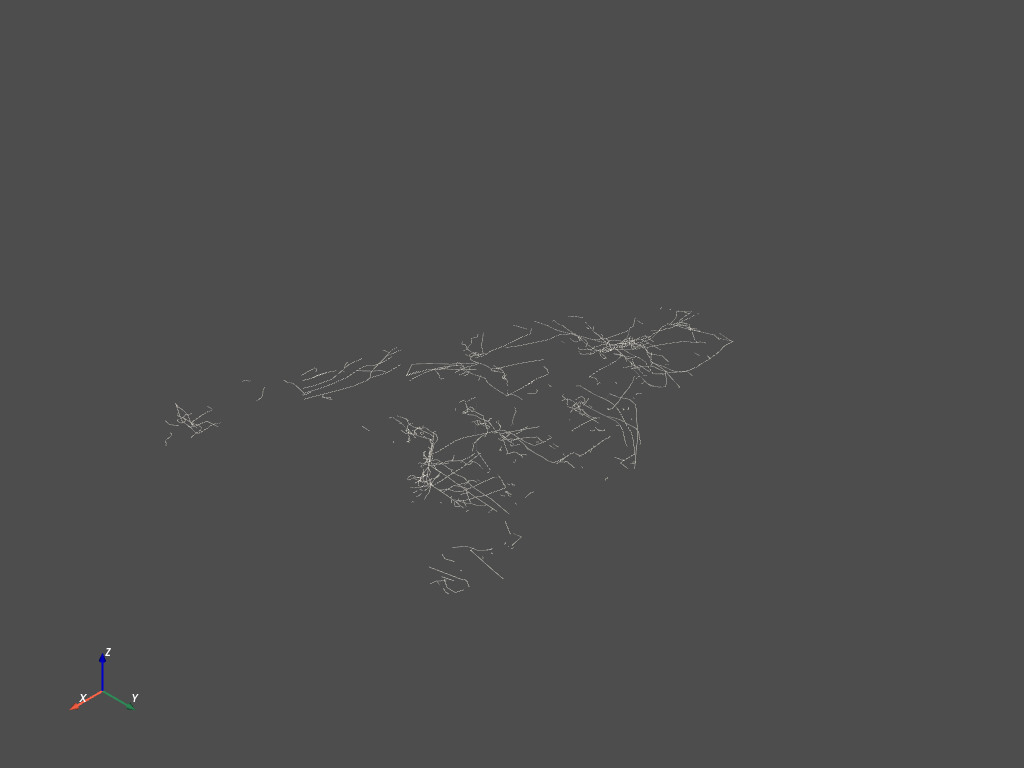

In [5]:
galeries = []

for idx, row in gdg.iterrows():
    vertices = np.array(row['geometry'].coords)
    line = pv.Spline(vertices)
    galeries.append(line.tube(radius = row['radius']))
    
b = pv.MultiBlock(galeries)
    
b.plot()  
#b.save('./tmp_files/galeries.vtm',binary=False)

A vtm file is exported in order to be able to better visualize in the Paraview software